# GloBox statistics

In [1]:
# Import required libraries
import numpy as np                             
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import scipy.stats as stats                      # statistical methods
import statsmodels.stats.proportion as prop      # statistical methods

In [2]:
# Read extracted data
df = pd.read_csv('view_globox-2023-06-15_122041.csv')

In [3]:
print(df.shape)
df.head()

(48943, 7)


,id,country,gender,device,group,total_spent,is_converted
0,1000000,CAN,M,I,B,0.0,No
1,1000001,BRA,M,A,A,0.0,No
2,1000002,FRA,M,A,A,0.0,No
3,1000003,BRA,M,I,B,0.0,No
4,1000004,DEU,F,A,A,0.0,No


In [4]:
df['id']=df['id'].astype(str)
df['is_converted'] = df['is_converted'].map(
                   {'Yes':1 ,'No':0})

In [5]:
df.head()

,id,country,gender,device,group,total_spent,is_converted
0,1000000,CAN,M,I,B,0.0,0
1,1000001,BRA,M,A,A,0.0,0
2,1000002,FRA,M,A,A,0.0,0
3,1000003,BRA,M,I,B,0.0,0
4,1000004,DEU,F,A,A,0.0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48943 entries, 0 to 48942
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            48943 non-null  object 
 1   country       48300 non-null  object 
 2   gender        42088 non-null  object 
 3   device        48649 non-null  object 
 4   group         48943 non-null  object 
 5   total_spent   48943 non-null  float64
 6   is_converted  48943 non-null  int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 2.6+ MB


In [7]:
# Summary stats
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
total_spent,48943.0,3.382736,25.674946,0.0,0.0,0.0,0.0,1659.4
is_converted,48943.0,0.042784,0.202373,0.0,0.0,0.0,0.0,1.0


In [8]:
# Split DataFrame based on 'group' column
df_group_A = df[df['group'] == 'A']
df_group_B = df[df['group'] == 'B']

In [9]:
print(df_group_A.shape)
df_group_A.head()

(24343, 7)


,id,country,gender,device,group,total_spent,is_converted
1,1000001,BRA,M,A,A,0.0,0
2,1000002,FRA,M,A,A,0.0,0
4,1000004,DEU,F,A,A,0.0,0
7,1000007,BRA,F,A,A,0.0,0
8,1000008,BRA,F,A,A,0.0,0


In [10]:
print(df_group_B.shape)
df_group_B.head()

(24600, 7)


,id,country,gender,device,group,total_spent,is_converted
0,1000000,CAN,M,I,B,0.0,0
3,1000003,BRA,M,I,B,0.0,0
5,1000005,GBR,F,A,B,0.0,0
6,1000006,ESP,M,A,B,0.0,0
10,1000010,BRA,M,I,B,0.0,0


In [11]:
# Summary stats
df_group_A.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
total_spent,24343.0,3.374518,25.936391,0.0,0.0,0.0,0.0,1659.4
is_converted,24343.0,0.039231,0.194148,0.0,0.0,0.0,0.0,1.0


In [12]:
# Summary stats
df_group_B.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
total_spent,24600.0,3.390867,25.41411,0.0,0.0,0.0,0.0,1546.3
is_converted,24600.0,0.046301,0.21014,0.0,0.0,0.0,0.0,1.0


In [13]:
# conversion rate
print('df_group_A conversion rate:', df_group_A['is_converted'].mean())
print('df_group_B conversion rate:', df_group_B['is_converted'].mean())

df_group_A conversion rate: 0.03923099042845993
df_group_B conversion rate: 0.04630081300813008


In [14]:
# Avg amount spent per user
print('df_group_A Avg amount spent per user:', df_group_A['total_spent'].mean())
print('df_group_B Avg amount spent per user:', df_group_B['total_spent'].mean())

df_group_A Avg amount spent per user: 3.374518467928841
df_group_B Avg amount spent per user: 3.390866945885783


In [15]:
count_A = len(df_group_A['is_converted'])
print('count_A:', count_A)
count_B = len(df_group_B['is_converted'])
print('count_B:', count_B)

is_converted_count_A = df_group_A['is_converted'].sum()
print('is_converted_count_A:', is_converted_count_A)
is_converted_count_B = df_group_B['is_converted'].sum()
print('is_converted_count_B:', is_converted_count_B)

count_A: 24343
count_B: 24600
is_converted_count_A: 955
is_converted_count_B: 1139


In [16]:
# hypothesis test to see whether there is a difference in the conversion rate between the two groups +  95% confidence interval for the difference in the conversion rate between the treatment and control (treatment-control)

#two samples, each with their respective sizes and successes
sample1_size = count_A
sample1_successes = is_converted_count_A

sample2_size = count_B
sample2_successes = is_converted_count_B

# Calculate the proportions for each sample
proportion1 = sample1_successes / sample1_size
proportion2 = sample2_successes / sample2_size

# Perform the two-proportion z-test
count = [sample1_successes, sample2_successes]
nobs = [sample1_size, sample2_size]

# Calculate the pooled proportion
pooled_proportion = (sample1_successes + sample2_successes) / (sample1_size + sample2_size)

# Calculate the standard error using the pooled proportion
standard_error = np.sqrt(pooled_proportion * (1 - pooled_proportion) * (1 / sample1_size + 1 / sample2_size))

# Calculate the test statistic
test_stat = (proportion1 - proportion2) / standard_error

# Calculate the p-value
pval = 2 * (1 - stats.norm.cdf(np.abs(test_stat)))

# Calculate the margin of error for the confidence interval
margin_of_error = stats.norm.ppf(0.975) * standard_error

# Calculate the confidence interval for the difference in proportions
lower_bound = abs(proportion1 - proportion2) - margin_of_error
upper_bound = abs(proportion1 - proportion2) + margin_of_error

# Print the results
print(f"Proportion 1: {proportion1:.4f}")
print(f"Proportion 2: {proportion2:.4f}")
print(f"Z-statistic: {test_stat:.4f}")
print(f"95% Confidence Interval for the Difference in Proportions: [{lower_bound:.4f}, {upper_bound:.4f}]")
print(f"P-value: {pval:.4f}")

# Define the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than the significance level
if pval < alpha:
    print("The difference in proportions is 'statistically significant'. REJECT the null hypothesis.")
else:
    print("The difference in proportions is 'statistically insignificant'. FAIL to REJECT the null hypothesis.")

Proportion 1: 0.0392
Proportion 2: 0.0463
Z-statistic: -3.8643
95% Confidence Interval for the Difference in Proportions: [0.0035, 0.0107]
P-value: 0.0001
The difference in proportions is 'statistically significant'. REJECT the null hypothesis.


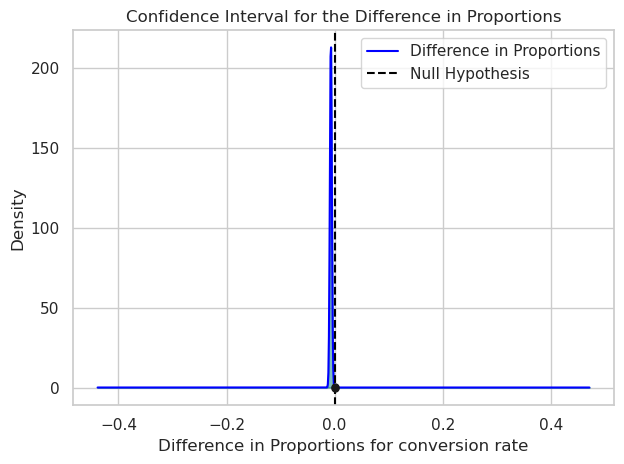

In [20]:
# Plotting the confidence interval
x = np.arange(lower_bound, upper_bound, 0.001)
y = stats.norm.pdf(x, (proportion1 - proportion2), standard_error)

sns.set(style='whitegrid')
fig, ax = plt.subplots()

ax.plot(x, y, label='Difference in Proportions', color='blue')
ax.fill_between(x, y, where=(x >= lower_bound) & (x <= upper_bound), color='teal', alpha=0.5)

# Highlight the null hypothesis value (zero difference)
ax.axvline(x=0, color='black', linestyle='--', label='Null Hypothesis')
ax.legend()

# Mark the upper and lower bounds with big dots
ax.plot(lower_bound, 'ko', markersize=5, label='Lower Bound')
ax.plot(upper_bound, 'ko', markersize=5, label='Upper Bound')

# Styling and labeling
ax.set_xlabel('Difference in Proportions for conversion rate')
ax.set_ylabel('Density')
ax.set_title('Confidence Interval for the Difference in Proportions')

plt.tight_layout()
plt.show()


In [18]:
#  hypothesis test to see whether there is a difference in the average amount spent per user between the two groups + 95% confidence interval for the difference in the average amount spent per user between the treatment and the control (treatment-control)

# two samples, each with their respective data points
sample1 = df_group_A['total_spent']  # Sample 1 data points
sample2 = df_group_B['total_spent']  # Sample 2 data points

# Calculate the means for each sample
mean1 = np.mean(sample1)
mean2 = np.mean(sample2)

# Calculate the sample statistic (difference in means)
sample_statistic = abs(mean1 - mean2)

# Perform the two-sample t-test
t_stat, pval = stats.ttest_ind(sample1, sample2, equal_var=False)

# Calculate the standard deviations for each sample
std1 = np.std(sample1, ddof=1)
std2 = np.std(sample2, ddof=1)

# Calculate the standard error for the difference in means
n1 = len(sample1)
n2 = len(sample2)
std_error = np.sqrt((std1**2 / n1) + (std2**2 / n2))

# Calculate the margin of error for the confidence interval
critical_value = stats.t.ppf(0.975, df=min(n1, n2) - 1)
margin_of_error = critical_value * std_error

# Calculate the confidence interval for the difference in means
lower_bound = sample_statistic - margin_of_error
upper_bound = sample_statistic + margin_of_error

# Print the results
print(f"Mean 1: {mean1:.4f}")
print(f"Mean 2: {mean2:.4f}")
print(f"T-statistic: {t_stat:.4f}")
print(f"Sample Statistic: {sample_statistic:.4f}")
print(f"95% Confidence Interval for the Difference in Means: [{lower_bound:.4f}, {upper_bound:.4f}]")
print(f"P-value: {pval:.4f}")

# Define the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than the significance level
if pval < alpha:
    print("The difference in Means for the average amount spent per user is 'statistically significant'. REJECT the null hypothesis.")
else:
    print("The difference in Means for the average amount spent per user is 'statistically insignificant'. FAIL to REJECT the null hypothesis.")


Mean 1: 3.3745
Mean 2: 3.3909
T-statistic: -0.0704
Sample Statistic: 0.0163
95% Confidence Interval for the Difference in Means: [-0.4387, 0.4714]
P-value: 0.9439
The difference in Means for the average amount spent per user is 'statistically insignificant'. FAIL to REJECT the null hypothesis.


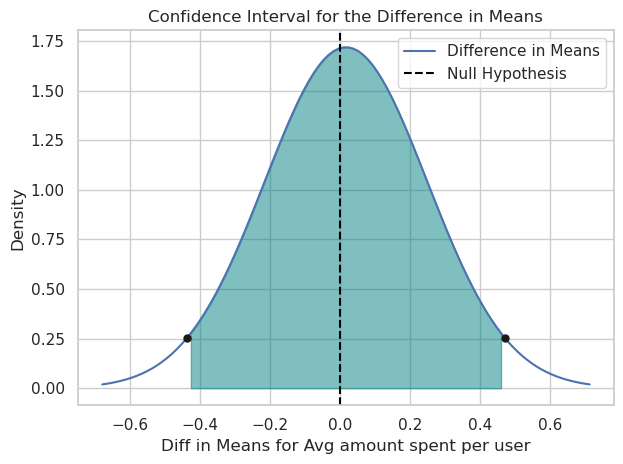

In [19]:
# Plotting the confidence interval
x = np.linspace(sample_statistic - 3 * std_error, sample_statistic + 3 * std_error, 100)
y = stats.norm.pdf(x, sample_statistic, std_error)

sns.set(style='whitegrid')
fig, ax = plt.subplots()

ax.plot(x, y, label='Difference in Means')
ax.fill_between(x, y, where=(x >= lower_bound) & (x <= upper_bound), color='teal', alpha=0.5)

# Highlight the null hypothesis value (zero difference)
ax.axvline(x=0, color='black', linestyle='--', label='Null Hypothesis')
ax.legend()

# Mark the upper and lower bounds with big dots
ax.plot(lower_bound, stats.norm.pdf(lower_bound, sample_statistic, std_error), 'ko', markersize=5, label='Lower Bound')
ax.plot(upper_bound, stats.norm.pdf(upper_bound, sample_statistic, std_error), 'ko', markersize=5, label='Upper Bound')

# Styling and labeling
ax.set_xlabel('Diff in Means for Avg amount spent per user')
ax.set_ylabel('Density')
ax.set_title('Confidence Interval for the Difference in Means')

plt.tight_layout()
plt.show()